In [1]:
import scipy.stats as stats
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
import seaborn as sns
sns.set(color_codes=True)

### Критерий хи-квадрат (критерий Пирсона)

$$ \chi^2_{obs} = \sum_{i=1}^{n}\frac{(O_i - E_i)^2}{E_i},$$

где $O_i$ - наблюдаемая частота наблюдения $i$,  $E_i$ - ожидаемая (т.е. в соответствии с распределением, принадлежность к которому мы тестируем) частота наблюдения $i$

$$ H_0: F_{obs} = F_{exp},$$
$$ H_1: F_{obs} \neq F_{exp}.$$

**Пример**

Попробуем оценить, соответсвует ли наше распределение теоретическому

In [4]:
observed_data = np.loadtxt("x2.csv")
labels, observed = np.unique(observed_data, return_counts=True)
observed = list(observed)

In [5]:
observed

[229, 211, 93, 35, 7, 1]

Будем проверять гипотезу о распределенности случайной величины по закону Пуассона

In [6]:
lambda_est = 1

In [7]:
max(labels)

7.0

In [8]:
expected = []
for i in range(int(max(labels))):
    expected.append(stats.poisson.pmf(i, lambda_est)*576)

Объеденим в одну группу все реализации случайной величины больше или равные 4:

In [9]:
observed_g = observed[0:4] + [sum(observed[4:])]

In [10]:
observed_g

[229, 211, 93, 35, 8]

In [11]:
expected_g = expected[0:4] + [sum(expected[4:])]

In [12]:
expected_g

[211.89855811475078,
 211.89855811475078,
 105.94927905737538,
 35.316426352458464,
 10.889231458674695]

In [13]:
stats.chisquare(observed_g, f_exp=expected_g)

(3.7361087255841845, 0.44289591770634085)

У нас нет оснований отклонить нулевую гипотезу о принадлежности данных к распределению Пуассона

### Критерий Шапиро-Уилка

Данный тест позволяет проверить гипотезу о нормальном распределении распределении генеральной совокупности.

$$H_0: X_1, ..., X_n \sim \mathbb{N} ,$$
$$H_1: X_1, ..., X_n \, \, \text{not} \, \, \mathbb{N}.$$

$$ W = \frac{(\sum_{i=1}^{n}a_i x_{(i)})^2}{\sum_{i=1}^{n}(x_{(i)} - \bar{x})^2}.$$

где $x_{(i)}$ - поряковая статистика, $a_{i}$ - затабулированные константы.

In [14]:
data = pd.read_csv('euro_weights', sep='\t', header=None,index_col=0, names=['weight', 'group'])

In [15]:
data

,weight,group
1,7.512,1
2,7.502,1
3,7.461,1
4,7.562,1
5,7.528,1
6,7.459,1
7,7.518,1
8,7.537,1
9,7.517,1
10,7.605,1


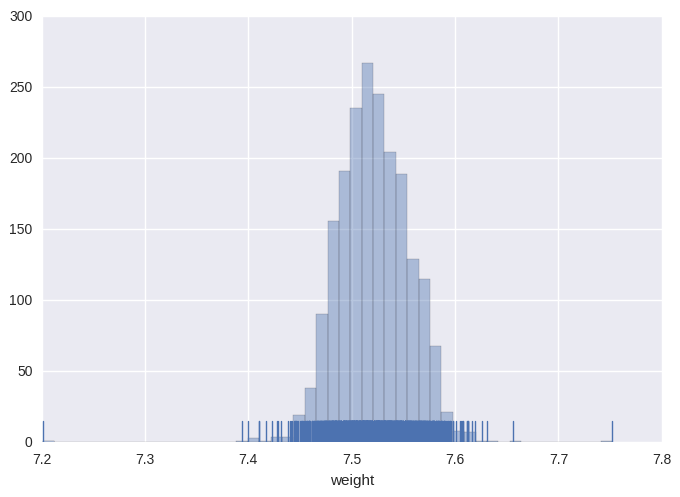

In [16]:
sns.distplot(data['weight'], kde=False, rug=True)

In [17]:
stats.shapiro(data['weight'])

(0.9754709601402283, 5.014394515895443e-18)

Несмотря на форму, напоминающую нормальное распределение, гипотезу о "нормальности" данных необходимо отклонить. Возможно, это связано с "выбросами".

In [18]:
newdf = data.copy()

newdf['x-Mean'] = abs(newdf['weight'] - newdf['weight'].mean())
newdf['1.96*std'] = 1.96*newdf['weight'].std()  
newdf['Outlier'] = abs(newdf['weight'] - newdf['weight'].mean()) > 1.96*newdf['weight'].std()
newdf

,weight,group,x-Mean,1.96*std,Outlier
1,7.512,1,0.009232,0.067383,False
2,7.502,1,0.019232,0.067383,False
3,7.461,1,0.060232,0.067383,False
4,7.562,1,0.040768,0.067383,False
5,7.528,1,0.006767,0.067383,False
6,7.459,1,0.062233,0.067383,False
7,7.518,1,0.003233,0.067383,False
8,7.537,1,0.015768,0.067383,False
9,7.517,1,0.004232,0.067383,False
10,7.605,1,0.083768,0.067383,True


In [19]:
stats.shapiro(newdf[newdf['Outlier'] == False]['weight'])

(0.9873573184013367, 5.26868869712982e-12)

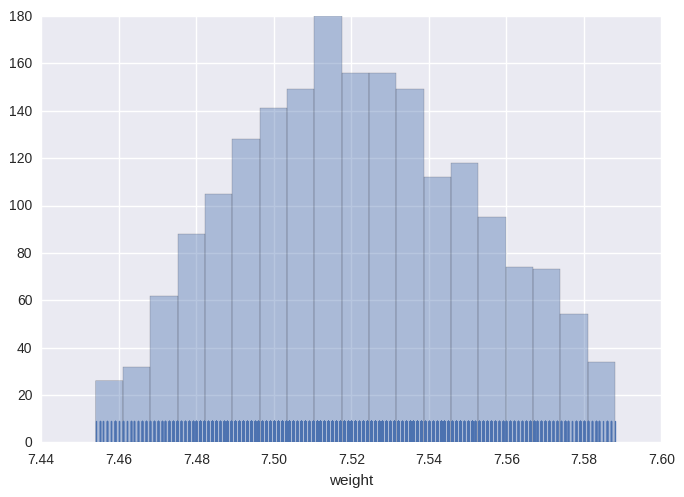

In [20]:
sns.distplot(newdf[newdf['Outlier'] == False]['weight'],  kde=False, rug=True)

In [21]:
x = stats.norm.rvs(loc=5, scale=3, size=1000)

In [22]:
stats.shapiro(x)

(0.9988994598388672, 0.8170647621154785)

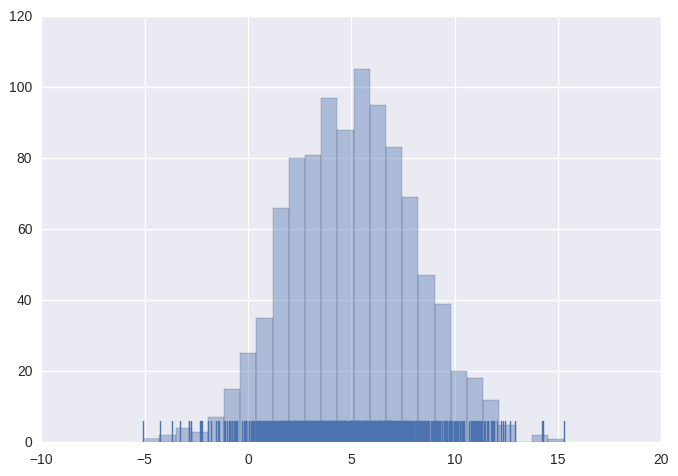

In [23]:
sns.distplot(x, kde=False, rug=True)

### Q-Q график

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Для быстрого визуального анализа "нормальности" рассматриваемой выборки может быть удобно построить Q-Q график - выборочных моментов против "теоретических". 

In [25]:
(quantiles, values), (slope, intercept, r) = stats.probplot(data['weight'], dist='norm')

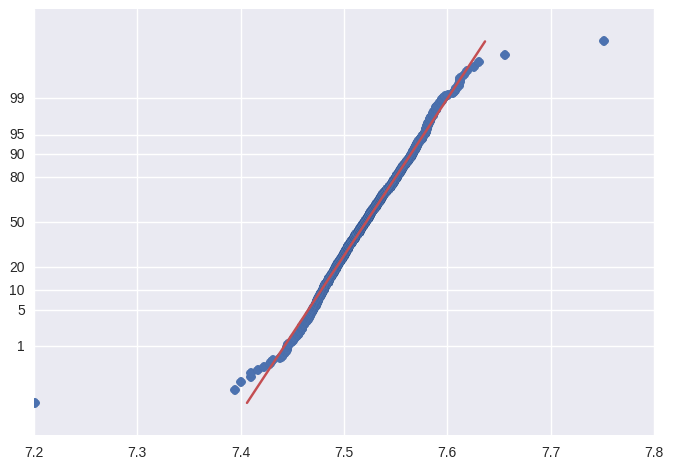

In [26]:
plt.plot(values, quantiles,'ob')
plt.plot(quantiles * slope + intercept, quantiles, 'r')
ticks_perc=[1, 5, 10, 20, 50, 80, 90, 95, 99]
ticks_quan=[stats.norm.ppf(i/100.) for i in ticks_perc]
plt.yticks(ticks_quan,ticks_perc)
plt.show()

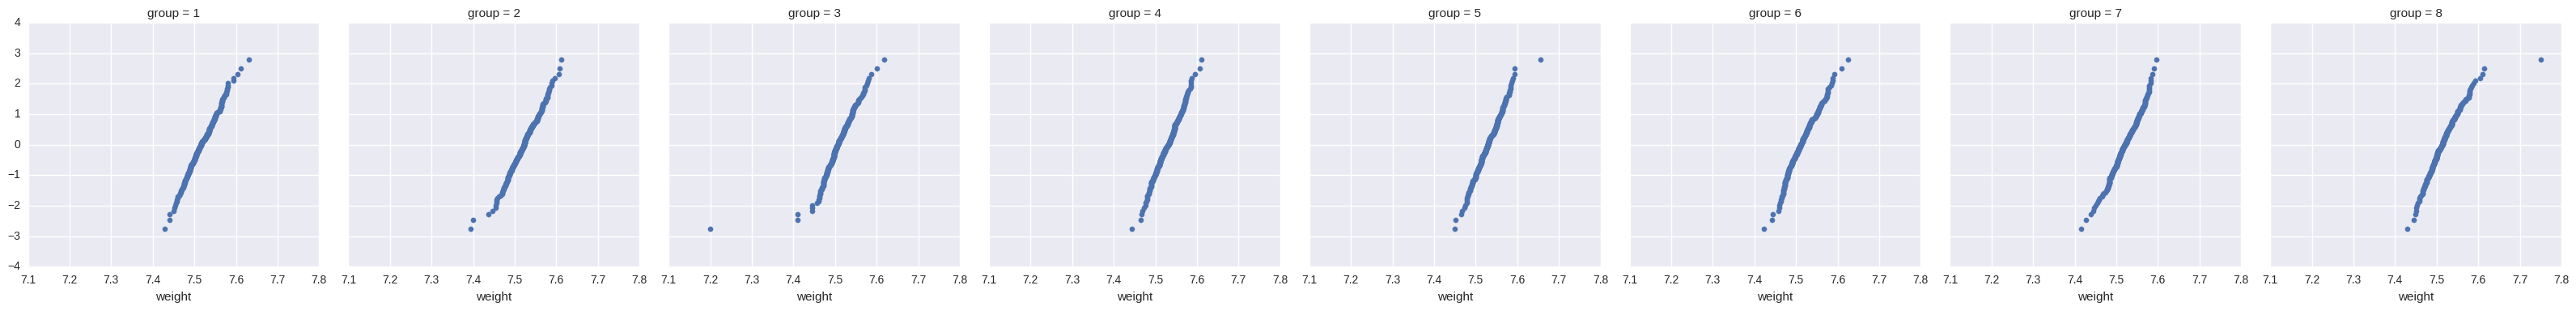

In [35]:
def quantile_plot(x, **kwargs):
    qntls, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, qntls, **kwargs)

g = sns.FacetGrid(data, col="group", size=4)
g.map(quantile_plot, "weight");

### Критерий Коломогорова-Смирнова

Данный тест позволяет протестировать гипотезу о том, что две выборки подчиняются одному и тому же распределению. Нулевая гипотеза:
$$ H_0: F(x) = G(x).$$
Альтернативная гипотеза может быть сформулирована как в форме одностроннего теста:
$$ H_0: F(x) > G(x),$$
так и в форме двустороннего теста:
$$ H_0: F(x) \neq G(x).$$

Тест рассматривает распределение статистики:
$$ D_mn = {\left( \frac{mn}{m+n} \right)}^{(1/2)} \sup_{x}\,\lvert F_n(x) - G_m(x)\rvert.$$
против теоретического распределения Колмогорова-Смирнова.

** Двусторонний тест:**

In [28]:
stats.kstest(data['weight'], alternative='two-sided', cdf='norm')

(0.99999999999970113, 0.0)

Двусторонний тест является более полезным и интерпретируемым

** Односторонний тест: **

In [29]:
x = stats.norm.rvs(loc=0.2, size=100)
stats.kstest(x,'norm', alternative = 'less')

(0.11788410842785613, 0.057234598283982807)

In [30]:
stats.kstest(x,'norm', alternative = 'greater')

(0.0074670159283150225, 0.98440447917457063)

Мы часто говорили о том, что распределение Стьюдента асимпотически сходится к нормальному. Давайте расмотрим на примере:

In [31]:
stats.kstest(stats.t.rvs(100,size=100),'norm')

(0.094309257459197826, 0.31719642705328255)

In [32]:
stats.kstest(stats.t.rvs(3,size=100),'norm')

(0.098075639069521603, 0.27363547167986746)

Для проверки гипотезы для двух выборок испольузется иная функция:

In [33]:
rvs1 = stats.norm.rvs(size=120, loc=0., scale=1)
rvs2 = stats.norm.rvs(size=220, loc=0.5, scale=1.5)

In [34]:
stats.ks_2samp(rvs1, rvs2)

(0.19318181818181823, 0.0051032134783306898)